In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


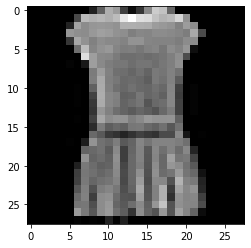

In [14]:
plt.imshow(X_train[3], cmap = 'gray')

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
y_test.shape

(10000,)

## Perform Data Visualization

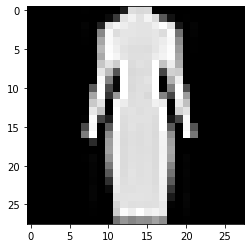

In [21]:
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'gray')

In [22]:
label = y_train[i]
label

3

In [23]:
W_grid = 15
L_grid = 15

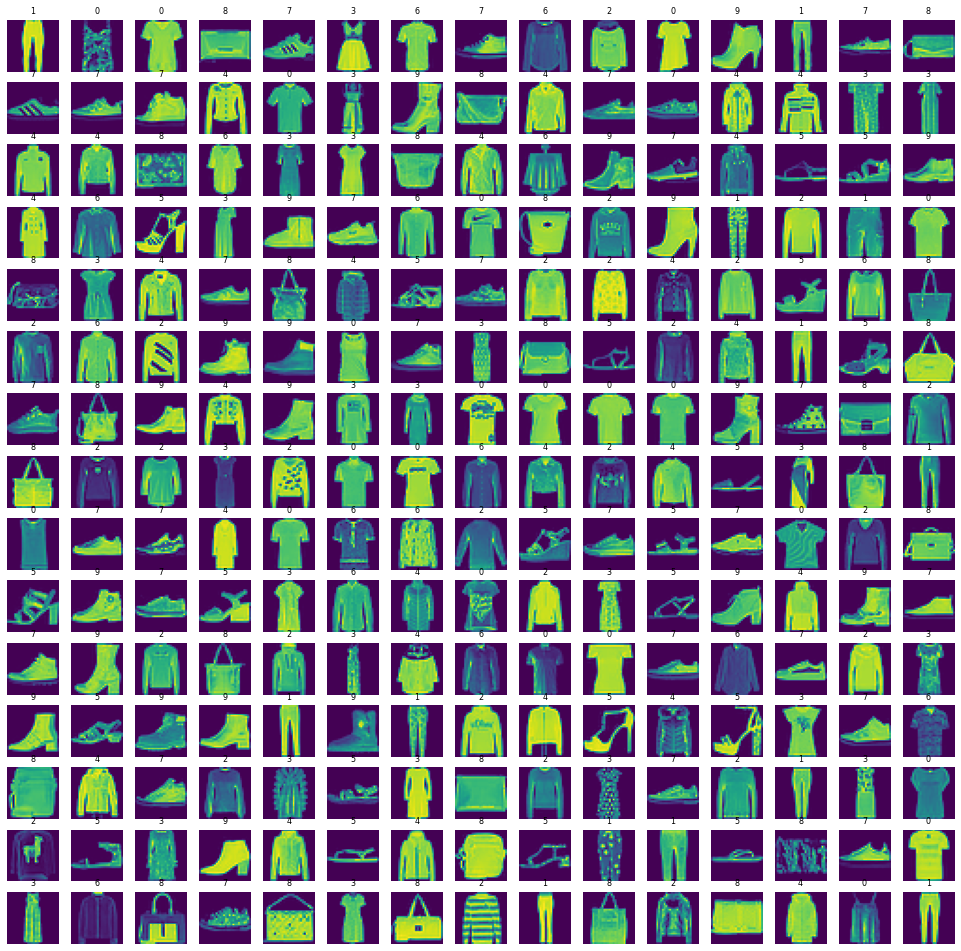

In [29]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

## Perform Data Preprocessing

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [43]:
# Adding noise
noise_factor = 0.3
noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [44]:
noise_dataset = np.array(noise_dataset)

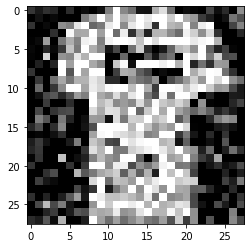

In [45]:
plt.imshow(noise_dataset[1], cmap = 'gray')

In [51]:
# Adding noise to test dataset
noise_factor = 0.1
noise_testdataset = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_testdataset.append(noisy_image)

In [52]:
noise_testdataset = np.array(noise_testdataset)

## Understand the theory and intution behind Autoencoders

### Intution: 
1. Autoencoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning)
2. Autoencoders use the same input data for the input abd output

### The Code Layer:
1. Autoencoders work by adding a bottleneck in the network
2. This bottleneck forces the network to create a compressed (encoded) version of the original input
3. Autoencoders work well if correlation exists between input data (performs poorly if all the input data is independent)

### Autoencoder Math:
    Encoder: _h(x)_ = _sigmoid_(W * x+b)
    Decoder: x^ = _sigmoid_(W * _h(x)_ + c)
Tied Weights = Weights from input to hidden layer will be equal to the weights from hidden layer to output

    W* = W^T (Transpose)

Where x = input, x^ = output, W = weight, h(x) = bottleneck encoded version

### Reconstruction Error:
1. Autoencoders objective is to minimize the reconstruction error which is the difference between the input x and the network output x^
2. Autoencoders dimensionality reduction (latent space) is quite similar to PCA if linear activation functions are used

## Build and Train Autoencoder Deep Learning Model

In [56]:
autoencoder = tf.keras.models.Sequential()

# encoder

autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))

# decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))

In [57]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [58]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_testdataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 17s 55ms/step - loss: 0.4009 - val_loss: 0.3229
Epoch 2/10
300/300 [==============================] - 17s 55ms/step - loss: 0.3194 - val_loss: 0.3066
Epoch 3/10
300/300 [==============================] - 17s 56ms/step - loss: 0.3108 - val_loss: 0.2992
Epoch 4/10
300/300 [==============================] - 17s 56ms/step - loss: 0.3072 - val_loss: 0.2966
Epoch 5/10
300/300 [==============================] - 16s 53ms/step - loss: 0.3047 - val_loss: 0.2927
Epoch 6/10
300/300 [==============================] - 16s 52ms/step - loss: 0.3033 - val_loss: 0.2911
Epoch 7/10
300/300 [==============================] - 17s 58ms/step - loss: 0.3023 - val_loss: 0.2903
Epoch 8/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3017 - val_loss: 0.2893
Epoch 9/10
300/300 [==============================] - 15s 51ms/step - loss: 0.3012 - val_loss: 0.2894
Epoch 10/10
300/300 [==============================] - 16s 52ms/step - loss: 0.300

## Evaluate Trained Model Performance

In [59]:
evaluation = autoencoder.evaluate(noise_testdataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Loss : {:.3f}'.format(evaluation))

313/313 [==============================] - 2s 7ms/step - loss: 0.2881
Test Loss : 0.288


In [60]:
predicted = autoencoder.predict(noise_testdataset[:10].reshape(-1, 28, 28, 1))

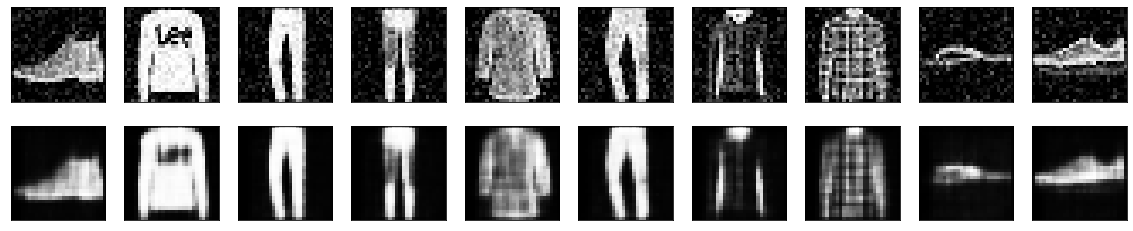

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_testdataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

## Notes

When training accuracy goes up and validation goes down it is an Overfitting problem and we should use early stopping to avaoid such condition

We use CNN for the encoder and decoder part of the model as CNNs are able to extract high level features in removing noise in images using autoencoder

